<a href="https://colab.research.google.com/github/Ronit-Pai/Lung-Cancer-Classification/blob/main/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef, roc_auc_score, accuracy_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

train_data = pd.read_csv("survey lung cancer.csv")
train_data = train_data.dropna()


y = train_data["LUNG_CANCER"].map({"YES": 1, "NO": 0})


X = pd.get_dummies(train_data.drop("LUNG_CANCER", axis=1), drop_first=True)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred) * 100
precision_scr = precision_score(y_test, y_pred)
recall_scr = recall_score(y_test, y_pred)
f1_scr = f1_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)
auroc_scr = roc_auc_score(y_test, y_pred)


print(f"Accuracy: {accuracy:.2f}%")
print("Precision score:", precision_scr)
print("Recall score:", recall_scr)
print("F1 score:", f1_scr)
print("MCC score:", mcc)
print("AUROC score:", auroc_scr)


new_data = pd.read_csv("predict_data.csv")
new_data = new_data.fillna(0)
X_new = pd.get_dummies(new_data, drop_first=True)
X_new = X_new.reindex(columns=X.columns, fill_value=0)

predictions = model.predict(X_new)
new_data['predicted_lung_cancer'] = pd.Series(predictions).map({1: "YES", 0: "NO"})

print(new_data)
new_data.to_csv("predictions_knn.csv", index=False)

pred_df = pd.read_csv("predictions_knn.csv")
pred_df["predicted_lung_cancer"] = pred_df["predicted_lung_cancer"].map({"YES": 1, "NO": 0})
pred_labels = pred_df["predicted_lung_cancer"]
true_labels = train_data["LUNG_CANCER"].map({"YES": 1, "NO": 0})

Accuracy: 95.16%
Precision score: 0.9830508474576272
Recall score: 0.9666666666666667
F1 score: 0.9747899159663865
MCC score: 0.38424725247655517
AUROC score: 0.7333333333333334
    GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0        M   69        1               2        2              1   
1        M   74        2               1        1              1   
2        F   59        1               1        1              2   
3        M   63        2               2        2              1   
4        F   63        1               2        1              1   
..     ...  ...      ...             ...      ...            ...   
304      F   56        1               1        1              2   
305      M   70        2               1        1              1   
306      M   58        2               1        1              1   
307      M   67        2               1        2              1   
308      M   62        1               1        1              2   

     

Confusion Matrix:
[[ 16  23]
 [  7 263]]


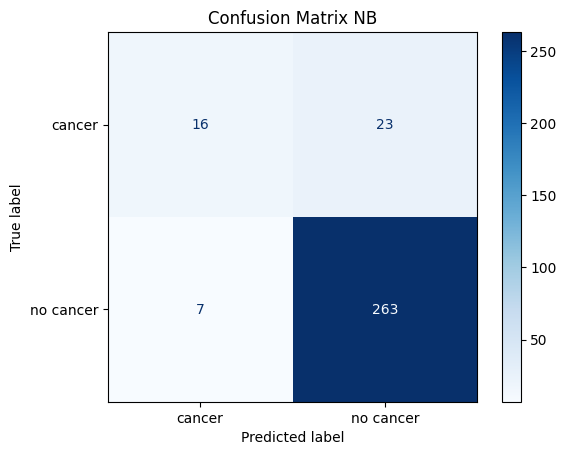

In [ ]:
cm = confusion_matrix(true_labels, pred_labels)
print("Confusion Matrix:")
print(cm)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["cancer","no cancer"])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix NB')
plt.show()